In [138]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.metrics import AUC

import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
import os
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *
from PIL import ImageFile,Image
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [55]:
path = Path("C:/Users/gteja/Downloads/chest_imgs/chest_xray")
path

Path('C:/Users/gteja/Downloads/chest_imgs/chest_xray')

In [101]:
def CreateData(dataframe, folder, label, fp,dir,index):
    for i,img in enumerate(folder):
        fname = os.path.basename(img)
        imgpath = os.path.join(fp,os.path.join(Path(dir),Path(fname)))
        vals = {'imagePath': imgpath, 'label': label}
        tempdf = pd.DataFrame(data = vals,index=[i+index])
        dataframe = pd.concat([dataframe,tempdf])
    return dataframe

In [57]:
val_pneumonia = (path/"val/PNEUMONIA").ls()
val_normal = (path/"val/NORMAL").ls()
val_normal

(#8) [Path('C:/Users/gteja/Downloads/chest_imgs/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg'),Path('C:/Users/gteja/Downloads/chest_imgs/chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg'),Path('C:/Users/gteja/Downloads/chest_imgs/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg'),Path('C:/Users/gteja/Downloads/chest_imgs/chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg'),Path('C:/Users/gteja/Downloads/chest_imgs/chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg'),Path('C:/Users/gteja/Downloads/chest_imgs/chest_xray/val/NORMAL/NORMAL2-IM-1438-0001.jpeg'),Path('C:/Users/gteja/Downloads/chest_imgs/chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg'),Path('C:/Users/gteja/Downloads/chest_imgs/chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg')]

In [129]:
cols = ['imagePath','label']
vals = pd.DataFrame(columns=cols)
vals = CreateData(vals,val_pneumonia,1,path,"val/PNEUMONIA",0)
vals = CreateData(vals,val_normal,0,path,"val/NORMAL",len(vals['imagePath']))

In [106]:
vals.describe()


,imagePath,label
count,16,16
unique,16,2
top,C:\Users\gteja\Downloads\chest_imgs\chest_xray\vals\PNEUMONIA\person1946_bacteria_4874.jpeg,1
freq,1,8


In [157]:
test_pneumonia = (path/"test/PNEUMONIA").ls()
test_normal = (path/"test/NORMAL").ls()

train_pneumonia = (path/"train/PNEUMONIA").ls()
train_normal = (path/"train/NORMAL").ls()

In [158]:
test = pd.DataFrame(columns=cols)
train = pd.DataFrame(columns=cols)

test = CreateData(test,test_pneumonia,1,path,"test/PNEUMONIA",0)
test = CreateData(test,test_normal,0,path,"test/NORMAL",len(test['imagePath']))

train = CreateData(train,train_pneumonia,1,path,"train/PNEUMONIA",0)
train = CreateData(train,train_normal,0,path,"train/NORMAL",len(train['imagePath']))

In [118]:
test.tail()

,imagePath,label
4104,C:\Users\gteja\Downloads\chest_imgs\chest_xray\test\NORMAL\NORMAL2-IM-0374-0001.jpeg,0
4105,C:\Users\gteja\Downloads\chest_imgs\chest_xray\test\NORMAL\NORMAL2-IM-0376-0001.jpeg,0
4106,C:\Users\gteja\Downloads\chest_imgs\chest_xray\test\NORMAL\NORMAL2-IM-0378-0001.jpeg,0
4107,C:\Users\gteja\Downloads\chest_imgs\chest_xray\test\NORMAL\NORMAL2-IM-0380-0001.jpeg,0
4108,C:\Users\gteja\Downloads\chest_imgs\chest_xray\test\NORMAL\NORMAL2-IM-0381-0001.jpeg,0


In [119]:
test['label'].value_counts()

label
1    3875
0     234
Name: count, dtype: int64

In [120]:
train['label'].value_counts()

label
1    3875
0    1341
Name: count, dtype: int64

In [121]:
train['imagePath']

0       C:\Users\gteja\Downloads\chest_imgs\chest_xray\train\PNEUMONIA\person1000_bacteria_2931.jpeg
1          C:\Users\gteja\Downloads\chest_imgs\chest_xray\train\PNEUMONIA\person1000_virus_1681.jpeg
2       C:\Users\gteja\Downloads\chest_imgs\chest_xray\train\PNEUMONIA\person1001_bacteria_2932.jpeg
3       C:\Users\gteja\Downloads\chest_imgs\chest_xray\train\PNEUMONIA\person1002_bacteria_2933.jpeg
4       C:\Users\gteja\Downloads\chest_imgs\chest_xray\train\PNEUMONIA\person1003_bacteria_2934.jpeg
                                                    ...                                             
5211           C:\Users\gteja\Downloads\chest_imgs\chest_xray\train\NORMAL\NORMAL2-IM-1406-0001.jpeg
5212           C:\Users\gteja\Downloads\chest_imgs\chest_xray\train\NORMAL\NORMAL2-IM-1412-0001.jpeg
5213           C:\Users\gteja\Downloads\chest_imgs\chest_xray\train\NORMAL\NORMAL2-IM-1419-0001.jpeg
5214           C:\Users\gteja\Downloads\chest_imgs\chest_xray\train\NORMAL\NORMAL2-IM-1422-

In [122]:
train.describe()

,imagePath,label
count,5216,5216
unique,5216,2
top,C:\Users\gteja\Downloads\chest_imgs\chest_xray\train\PNEUMONIA\person1000_bacteria_2931.jpeg,1
freq,1,3875


In [123]:
def load_image(path):
    img = Image.open(path)
    img = img.resize((224, 224))  # Resize
    img_array = np.array(img) / 255.0  # Normalize
    return img_array


In [124]:
vals['imagePath'][1]

'C:\\Users\\gteja\\Downloads\\chest_imgs\\chest_xray\\vals\\PNEUMONIA\\person1946_bacteria_4875.jpeg'

In [132]:
print(load_image(vals['imagePath'][0]))

[[0.0627451  0.0745098  0.07843137 ... 0.05098039 0.04705882 0.04705882]
 [0.0627451  0.07058824 0.0745098  ... 0.07058824 0.0745098  0.0745098 ]
 [0.0627451  0.07058824 0.07843137 ... 0.09411765 0.0745098  0.0627451 ]
 ...
 [0.01568627 0.02745098 0.02352941 ... 0.00784314 0.01568627 0.01176471]
 [0.25098039 0.03137255 0.02352941 ... 0.00784314 0.01176471 0.23529412]
 [0.06666667 0.03137255 0.02352941 ... 0.00784314 0.01568627 0.05490196]]


In [134]:
vals['image'] = vals['imagePath'].apply(load_image)

In [159]:
test['imagePath'][1]

'C:\\Users\\gteja\\Downloads\\chest_imgs\\chest_xray\\test\\PNEUMONIA\\person100_bacteria_477.jpeg'

In [135]:
vals.head()

,imagePath,label,image
0,C:\Users\gteja\Downloads\chest_imgs\chest_xray\val\PNEUMONIA\person1946_bacteria_4874.jpeg,1,"[[0.06274509803921569, 0.07450980392156863, 0.0784313725490196, 0.07450980392156863, 0.08235294117647059, 0.09803921568627451, 0.10588235294117647, 0.11764705882352941, 0.12549019607843137, 0.12941176470588237, 0.14901960784313725, 0.1411764705882353, 0.3411764705882353, 0.37254901960784315, 0.788235294117647, 0.1450980392156863, 0.1568627450980392, 0.16470588235294117, 0.16862745098039217, 0.16862745098039217, 0.16862745098039217, 0.16470588235294117, 0.1607843137254902, 0.1607843137254902, 0.1607843137254902, 0.1607843137254902, 0.12549019607843137, 0.5803921568627451, 0.7450980392156863..."
1,C:\Users\gteja\Downloads\chest_imgs\chest_xray\val\PNEUMONIA\person1946_bacteria_4875.jpeg,1,"[[0.00784313725490196, 0.00784313725490196, 0.00784313725490196, 0.00392156862745098, 0.00392156862745098, 0.00392156862745098, 0.00392156862745098, 0.00392156862745098, 0.0, 0.0, 0.0392156862745098, 0.25098039215686274, 0.5568627450980392, 0.41568627450980394, 0.0, 0.023529411764705882, 0.0392156862745098, 0.043137254901960784, 0.050980392156862744, 0.058823529411764705, 0.06666666666666667, 0.06666666666666667, 0.07058823529411765, 0.050980392156862744, 0.24705882352941178, 0.8549019607843137, 0.10196078431372549, 0.07058823529411765, 0.03137254901960784, 0.6078431372549019, 0.5725490196..."
2,C:\Users\gteja\Downloads\chest_imgs\chest_xray\val\PNEUMONIA\person1947_bacteria_4876.jpeg,1,"[[0.00392156862745098, 0.3137254901960784, 0.8862745098039215, 0.12156862745098039, 0.09803921568627451, 0.403921568627451, 0.8980392156862745, 0.25098039215686274, 0.27058823529411763, 0.2901960784313726, 0.30980392156862746, 0.33725490196078434, 0.37254901960784315, 0.39215686274509803, 0.4117647058823529, 0.43529411764705883, 0.44313725490196076, 0.45098039215686275, 0.4823529411764706, 0.47843137254901963, 0.49411764705882355, 0.4980392156862745, 0.5019607843137255, 0.5098039215686274, 0.5176470588235295, 0.5333333333333333, 0.5490196078431373, 0.5490196078431373, 0.5647058823529412, 0..."
3,C:\Users\gteja\Downloads\chest_imgs\chest_xray\val\PNEUMONIA\person1949_bacteria_4880.jpeg,1,"[[0.0, 0.0, 0.00784313725490196, 0.03529411764705882, 0.054901960784313725, 0.09411764705882353, 0.11764705882352941, 0.11764705882352941, 0.10980392156862745, 0.13725490196078433, 0.17254901960784313, 0.20784313725490197, 0.2549019607843137, 0.30196078431372547, 0.3333333333333333, 0.35294117647058826, 0.3803921568627451, 0.38823529411764707, 0.39215686274509803, 0.39215686274509803, 0.39215686274509803, 0.38823529411764707, 0.4, 0.4666666666666667, 0.49411764705882355, 0.5215686274509804, 0.5215686274509804, 0.5215686274509804, 0.5098039215686274, 0.5215686274509804, 0.5254901960784314, ..."
4,C:\Users\gteja\Downloads\chest_imgs\chest_xray\val\PNEUMONIA\person1950_bacteria_4881.jpeg,1,"[[0.0, 0.0, 0.0, 0.023529411764705882, 0.043137254901960784, 0.06274509803921569, 0.08627450980392157, 0.11372549019607843, 0.1607843137254902, 0.21176470588235294, 0.2627450980392157, 0.29411764705882354, 0.3215686274509804, 0.35294117647058826, 0.3843137254901961, 0.39215686274509803, 0.403921568627451, 0.4235294117647059, 0.43529411764705883, 0.4470588235294118, 0.45098039215686275, 0.4588235294117647, 0.5019607843137255, 0.5294117647058824, 0.5333333333333333, 0.5490196078431373, 0.5450980392156862, 0.5450980392156862, 0.5568627450980392, 0.5764705882352941, 0.6, 0.6, 0.615686274509804..."


In [160]:
test['image'] = test['imagePath'].apply(load_image)

In [161]:
train['image'] = train['imagePath'].apply(load_image)


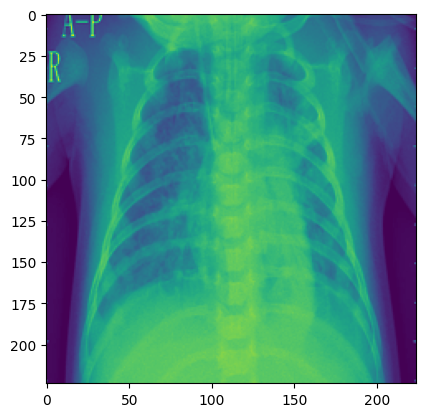

In [153]:
plt.imshow(vals['image'][0])

<h4>Test CNN</h4>

In [148]:
sample_model = keras.Sequential([
    keras.layers.Conv2D(filters = 32,kernel_size=3,activation='relu',padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Conv2D(filters = 32,kernel_size=3,activation='relu',padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Conv2D(filters = 32,kernel_size=3,activation='relu',padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Flatten(),

    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])


In [166]:
sample_model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=[AUC()])